Space & Time

1-D Diffusion


$$\frac{\partial u}{\partial t} = v \frac{\partial^2 u}{\partial x^2}$$

v is the constant known as the diffusion coefficient

This equation has a second order derivative

Discrtetizing 2nd-Order Derivatives

Second order derivative can be represented geometrically as the line tangent to the curve given by the first derivative. discretize the second order with a Central Difference scheme: combination of forward difference and backward difference. Consider the Taylor Expansion:

$$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial^2 u}{\partial x^2} \big|_i + \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)$$

$$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial^2 u}{\partial x^2} \big|_i - \frac{\Delta x^3}{3!} \frac{\partial^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)$$

Adding the two expansions above, the odd-numbered derivatives will cancel out. We can rearrange:

$$u_{i+1} + u_{i-1} = 2u_i + \frac{\Delta x^2}{2!} \frac{\partial^2 u}{\partial x^2} \big|_i + {\mathcal O}(\Delta x^4)$$

And Finally:

$$\frac{\partial^2 u}{\partial x^2} = \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2)$$

Back to Diffusion

Now we will write the discretized version of the 1D equation.

$$\frac{u_i^{n+1} - u_i^n}{\Delta t} = v\frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

Once we have an initial condition the only unkown is $u_i^{n+1}$

So we can isolate this term with the re-arranged equation:

$$ u_i^{n+1} = u_i^n + \frac{v |Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$



Stability of the diffusion equation

$$v\frac{\Delta t}{\Delta x^2} \le \frac{1}{2}$$



In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
dx = 2./(nx-1)
nt = 20
nu = 0.3 #value of viscosity
sigma = .2
dt = sigma*dx**2/nu

x = numpy.linspace(0,2,nx)
ubound = numpy.where(x >= 0.5)
lbound = numpy.where(x <= 1)

u = numpy.ones(nx)
u[numpy.intersect1d(lbound, ubound)] = 2

un = numpy.ones(nx)

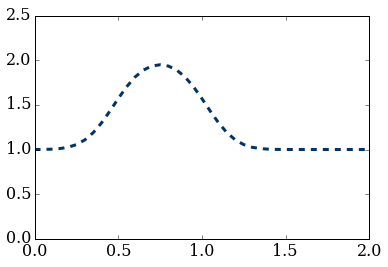

In [4]:
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2])
    
pyplot.plot(x,u, color ='#003366', ls='--', lw = 3)
pyplot.ylim(0,2.5);

In [5]:
#Animations!

from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [6]:
nt = 50

u = numpy.ones(nx)
u[numpy.intersect1d(lbound, ubound)] = 2

un = numpy.ones(nx)


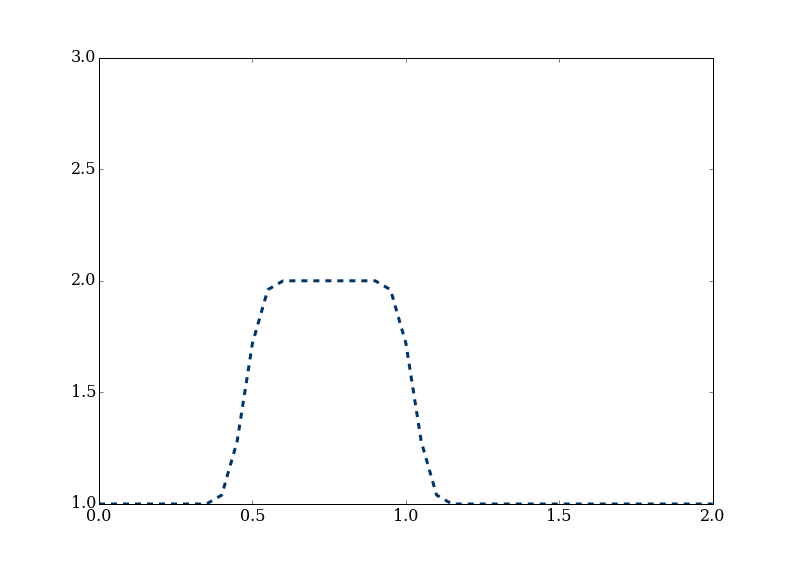
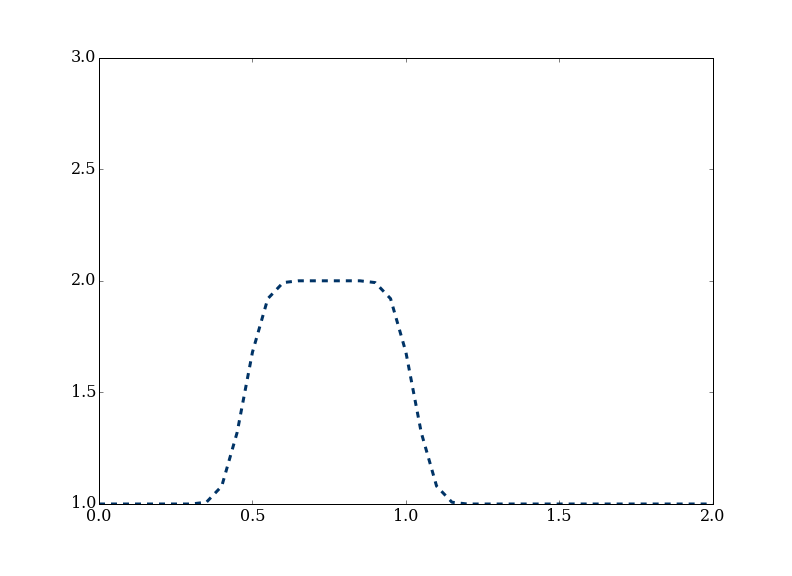
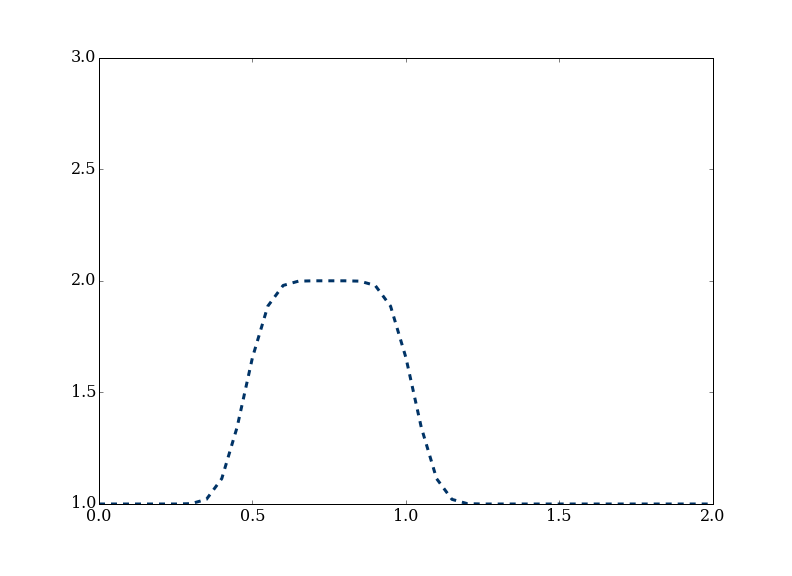
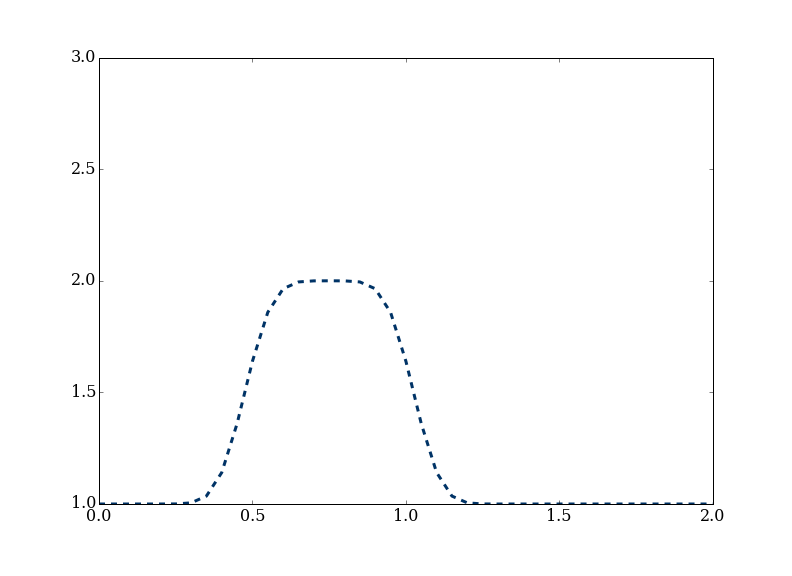
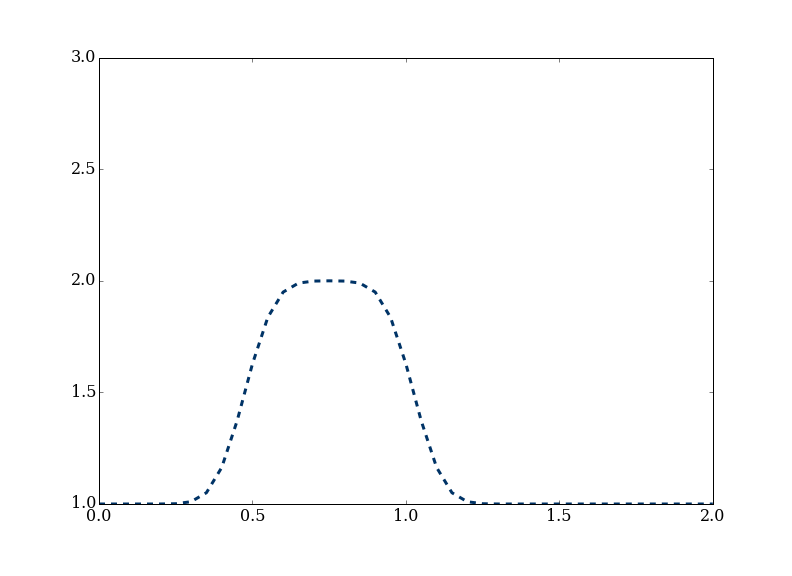
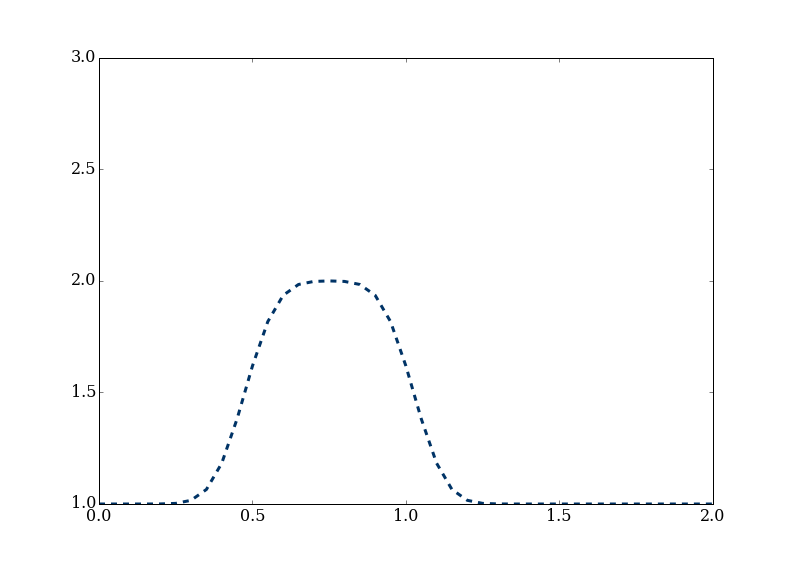
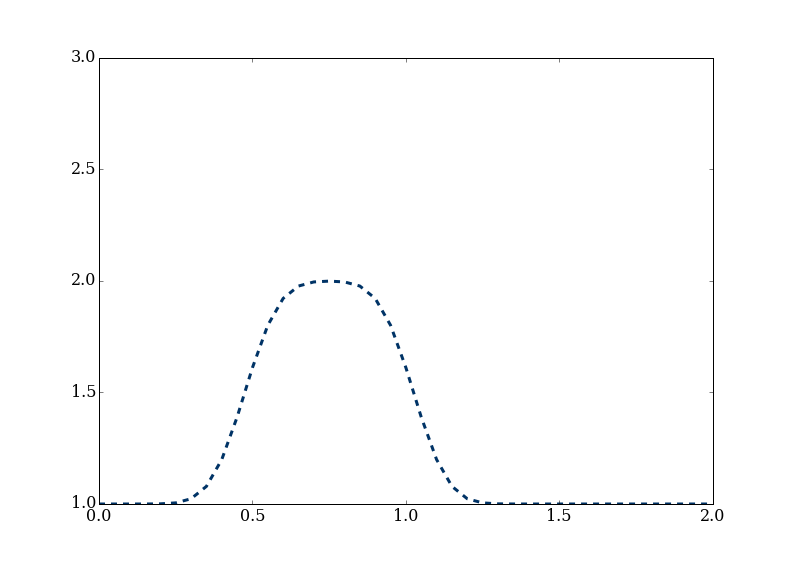
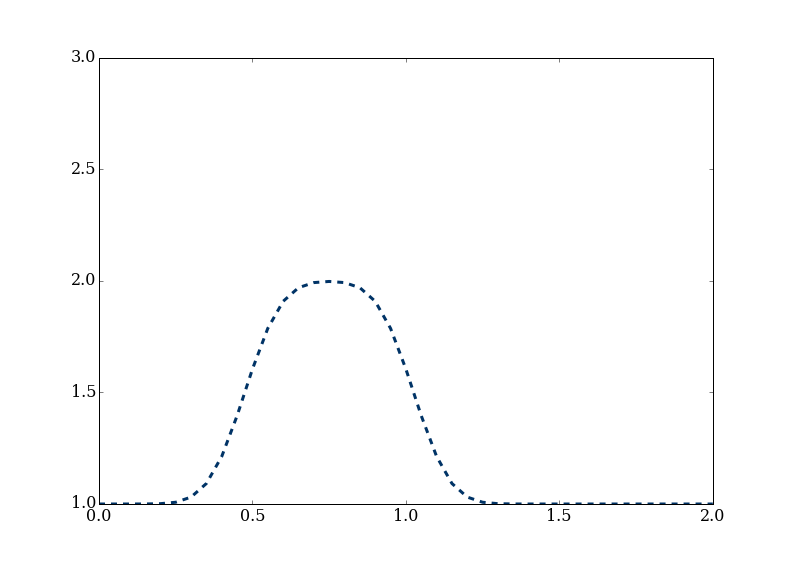
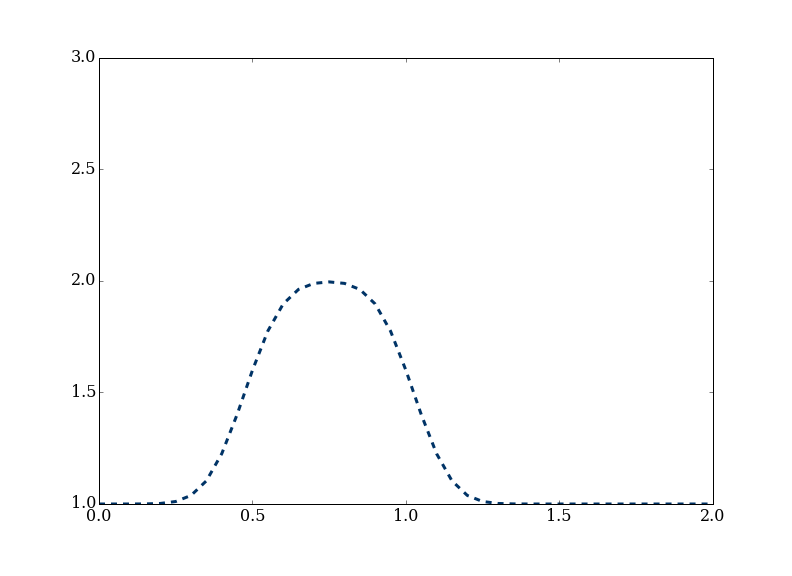
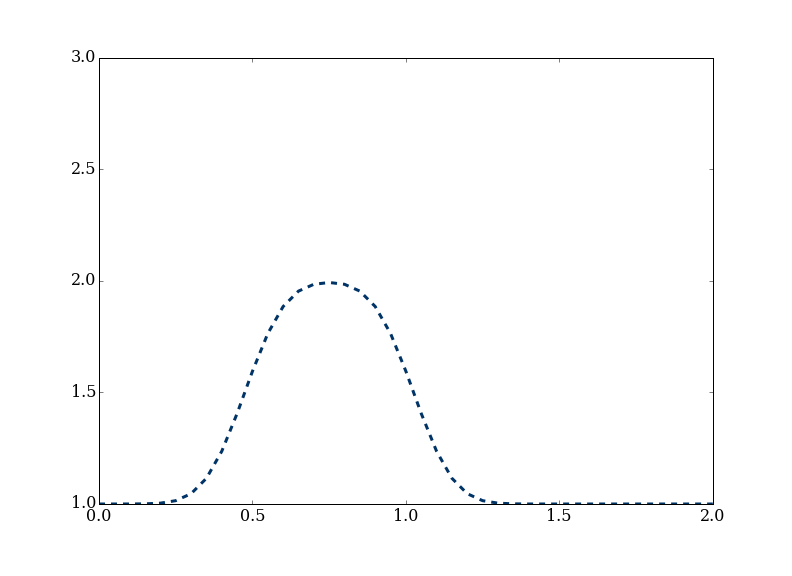
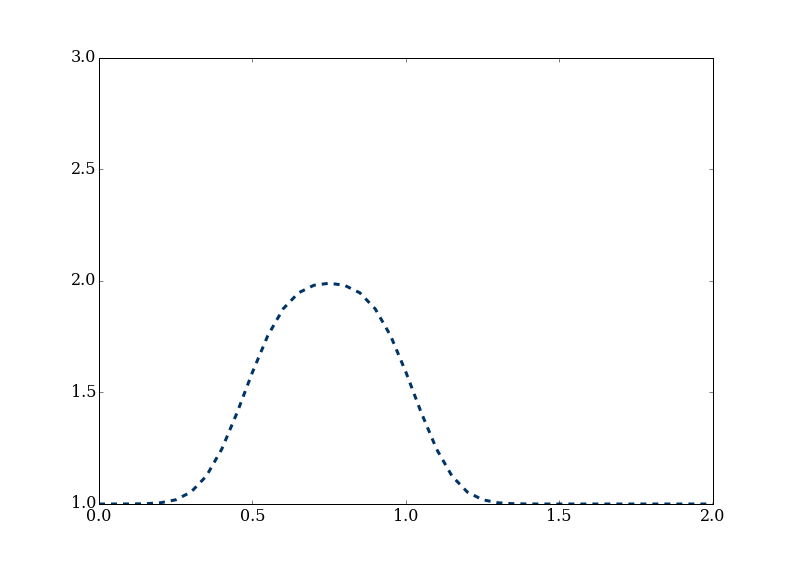
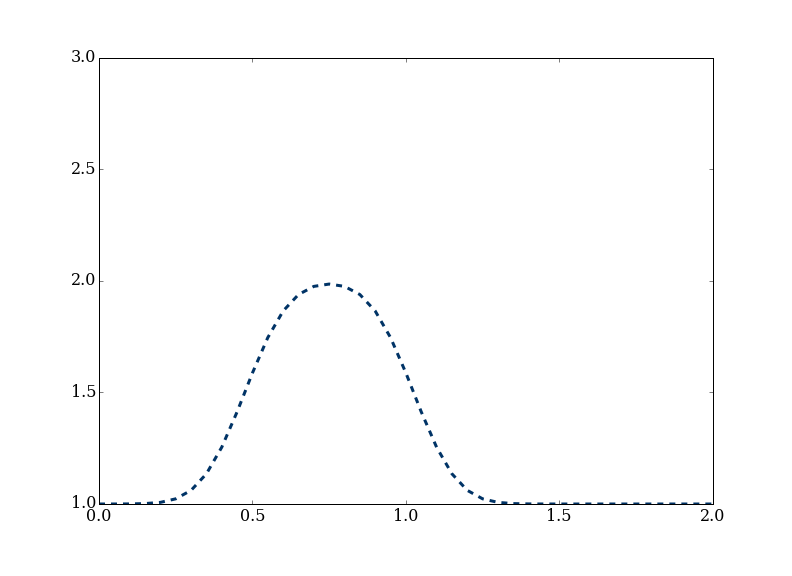
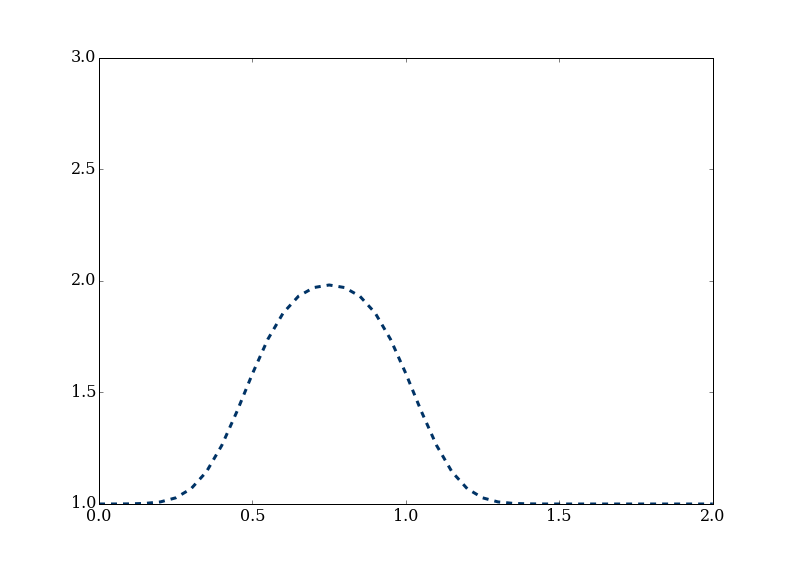
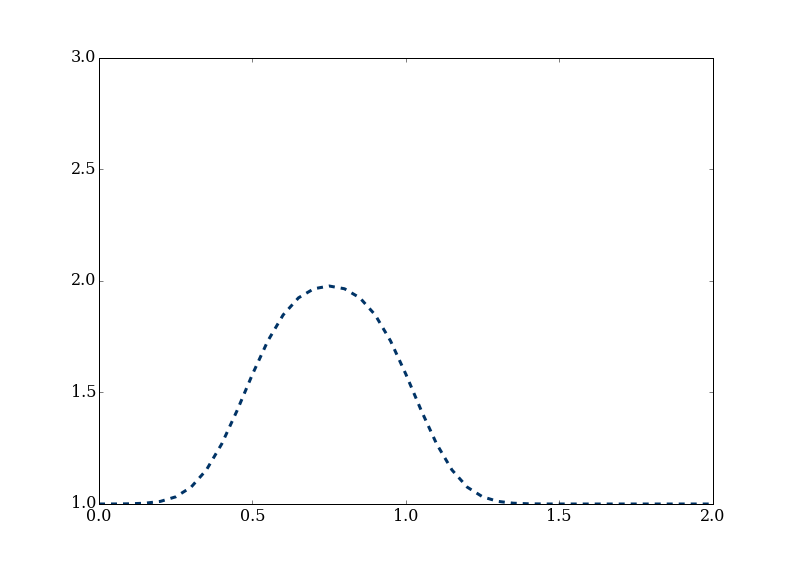
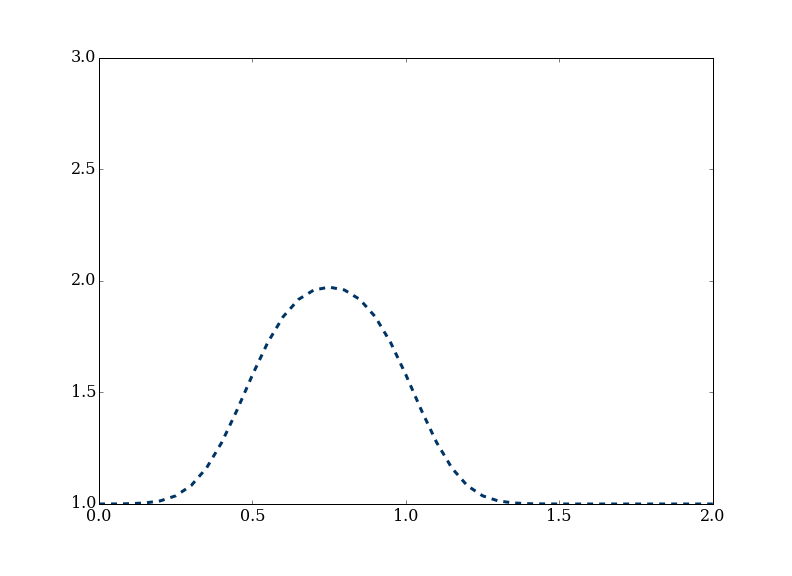
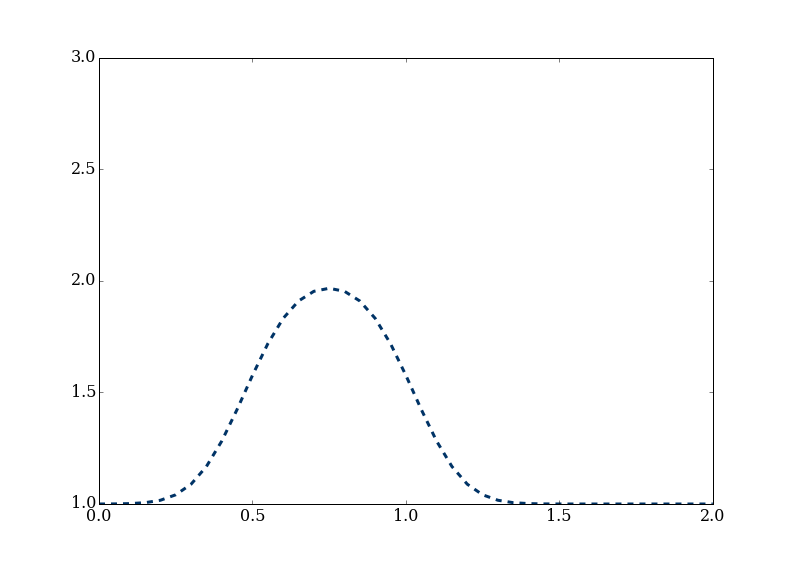
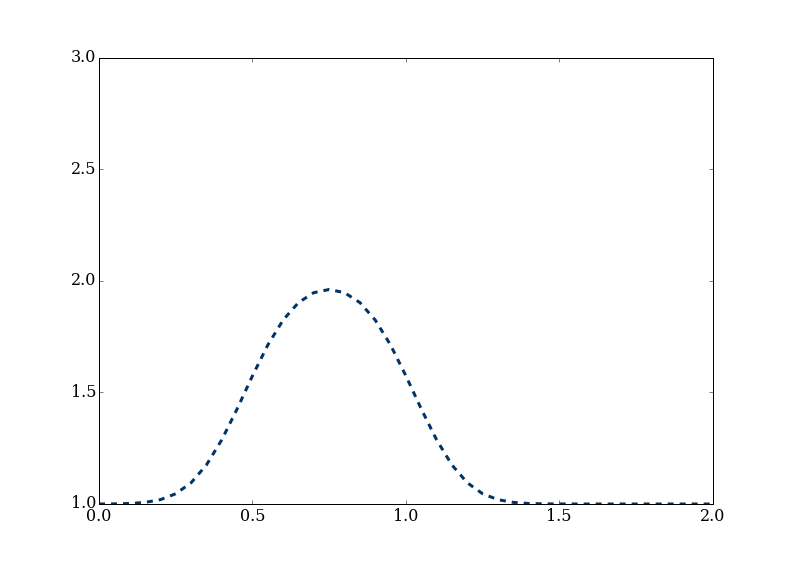
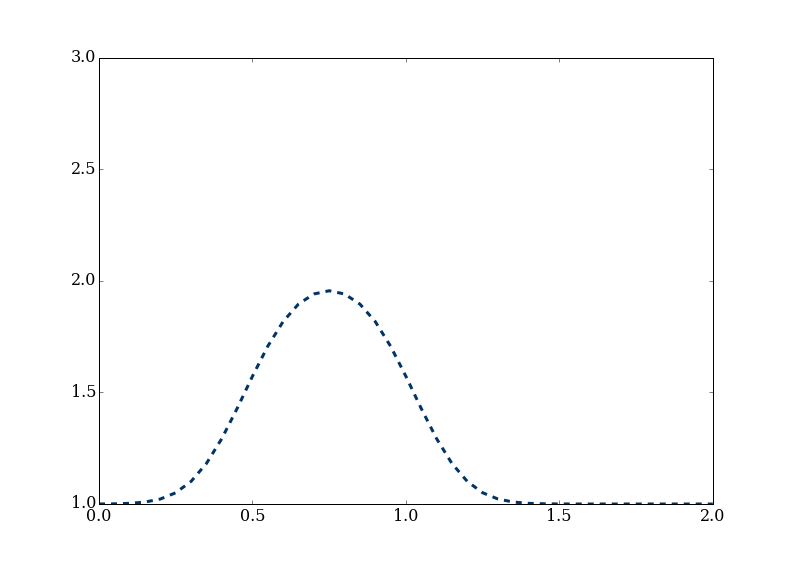
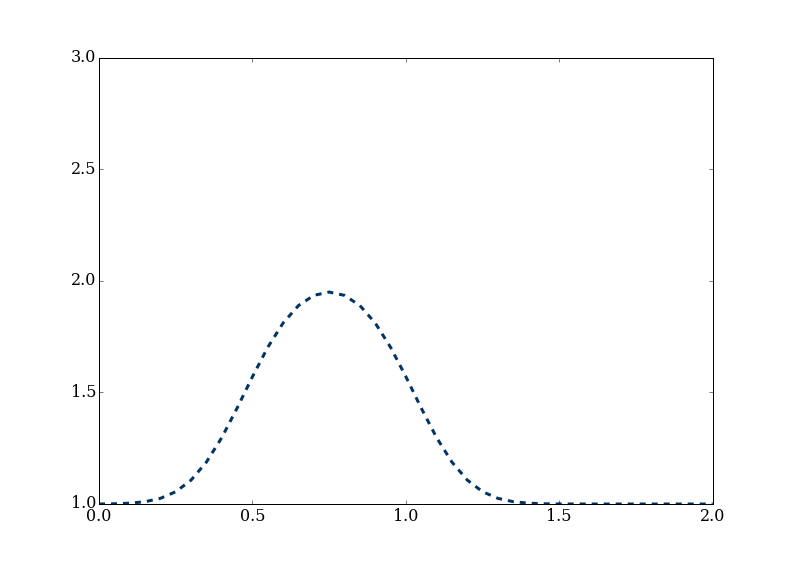
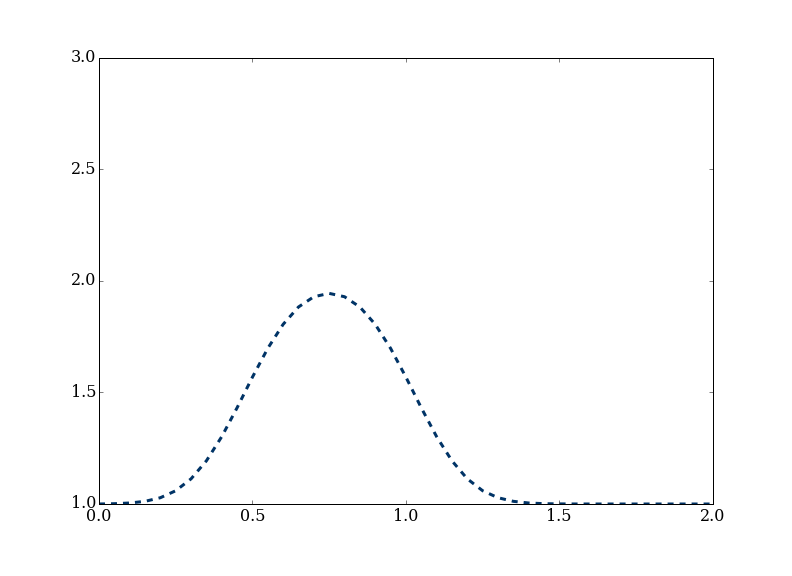
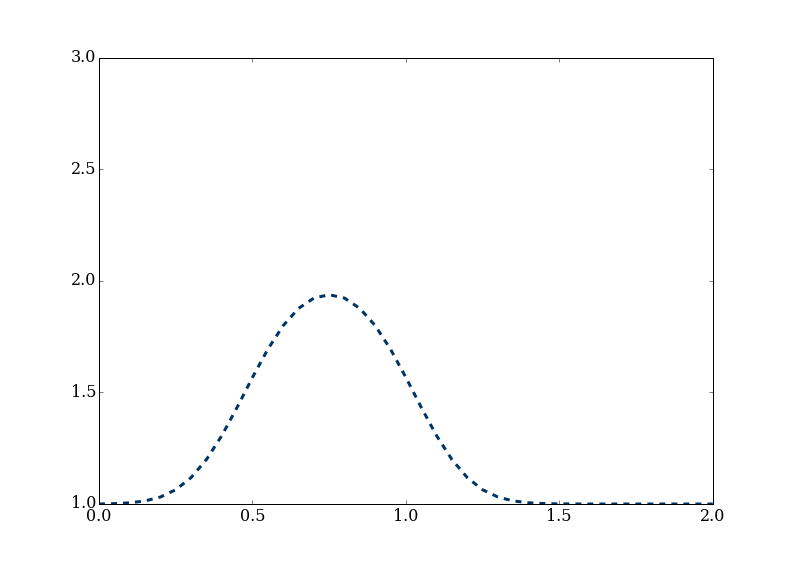
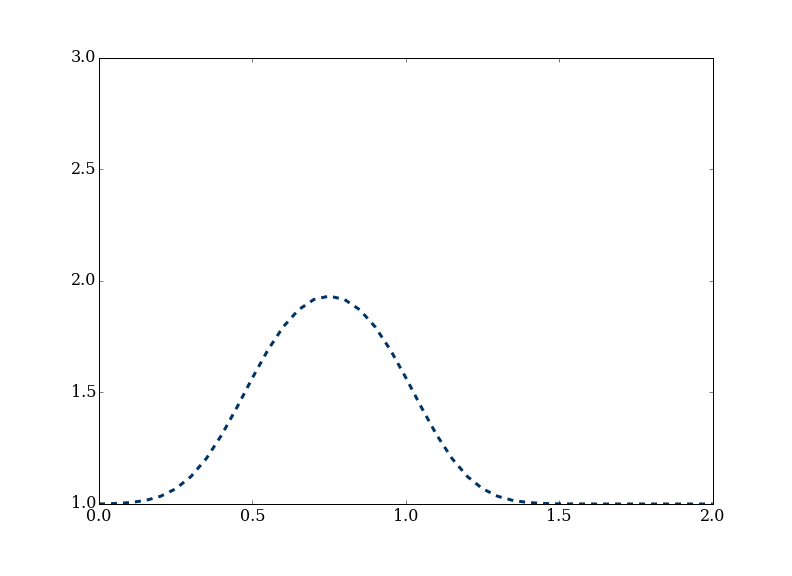
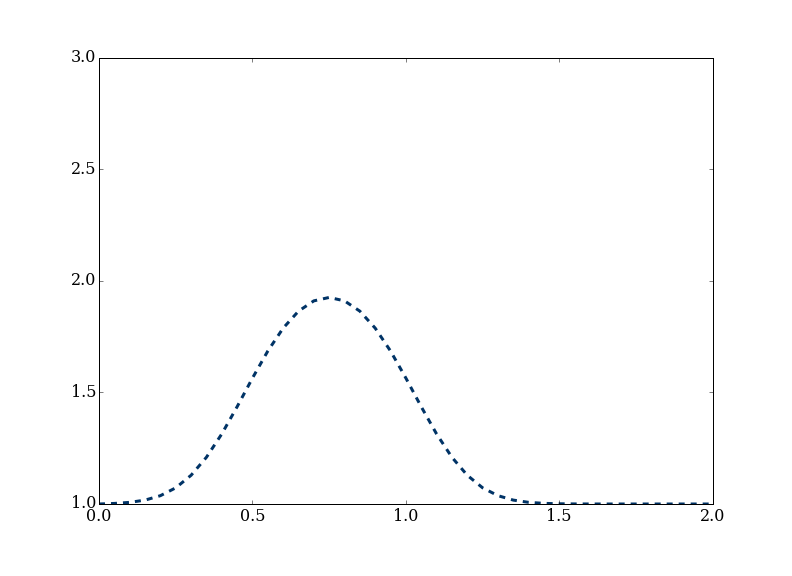
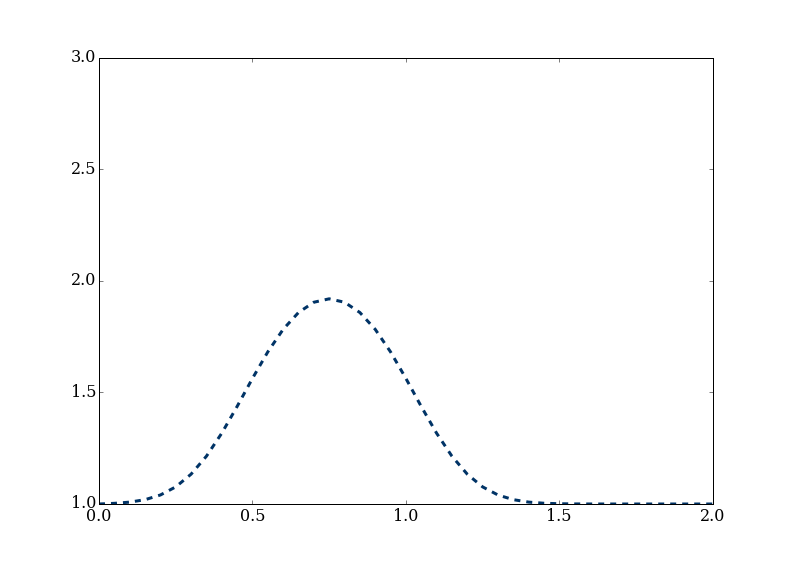
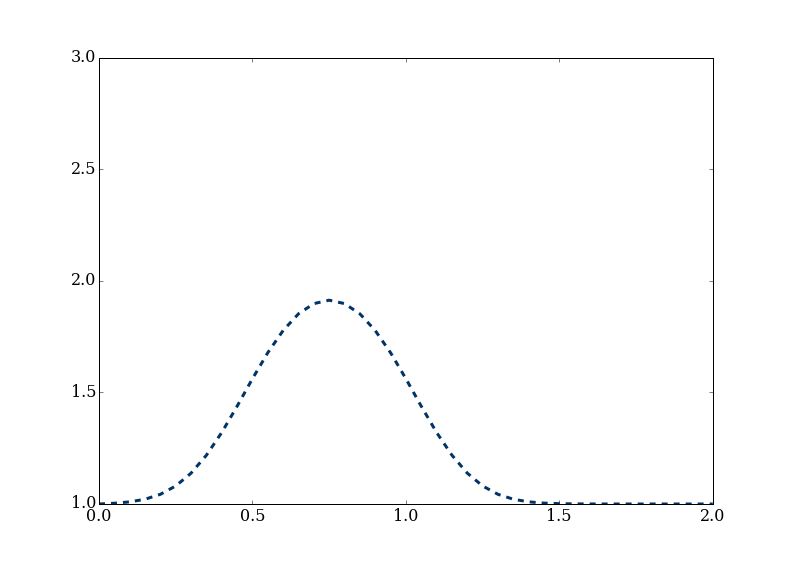
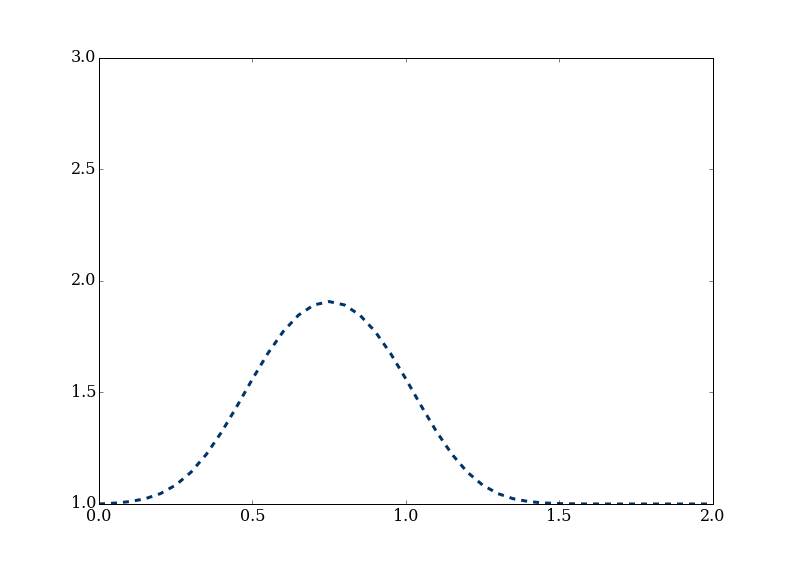
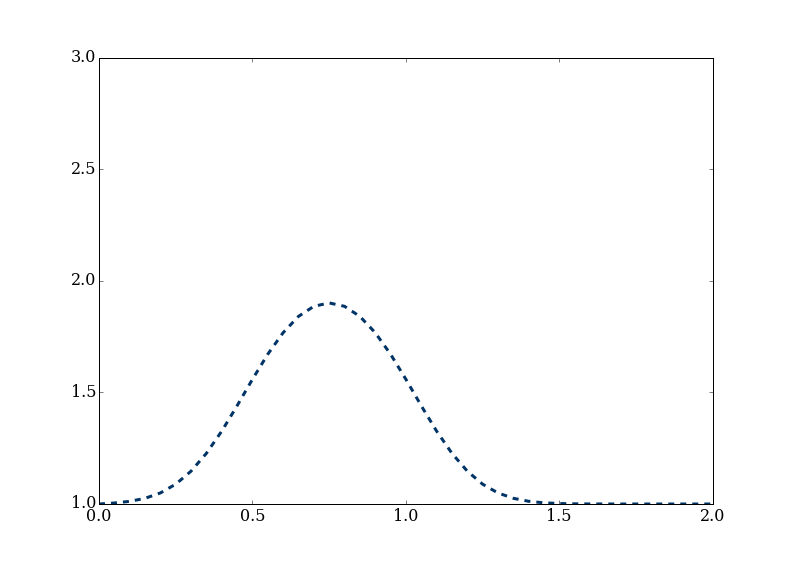
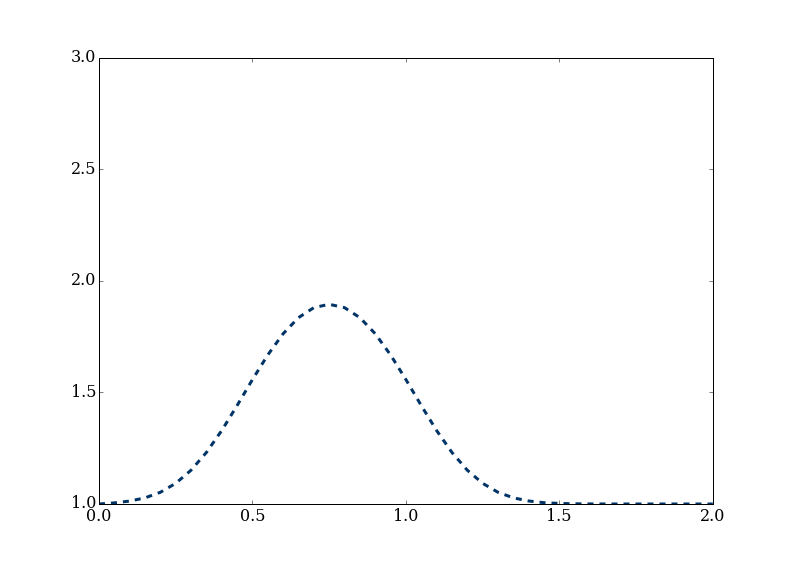
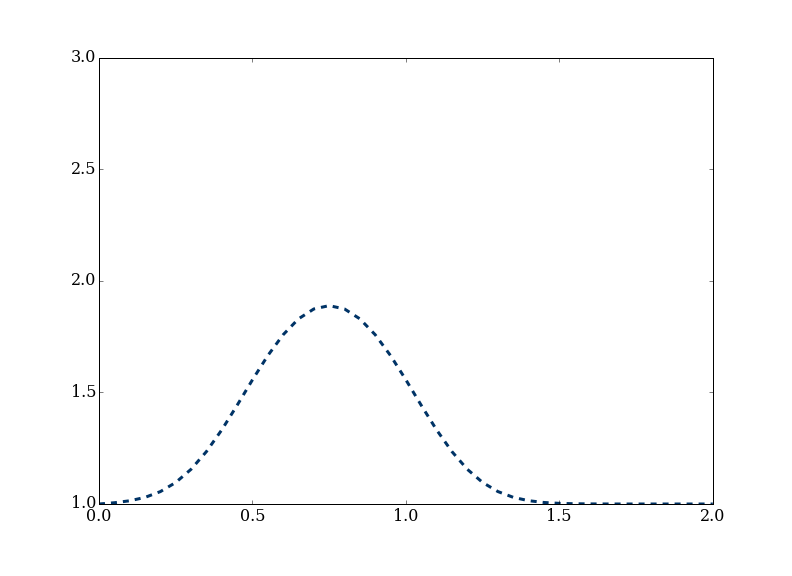
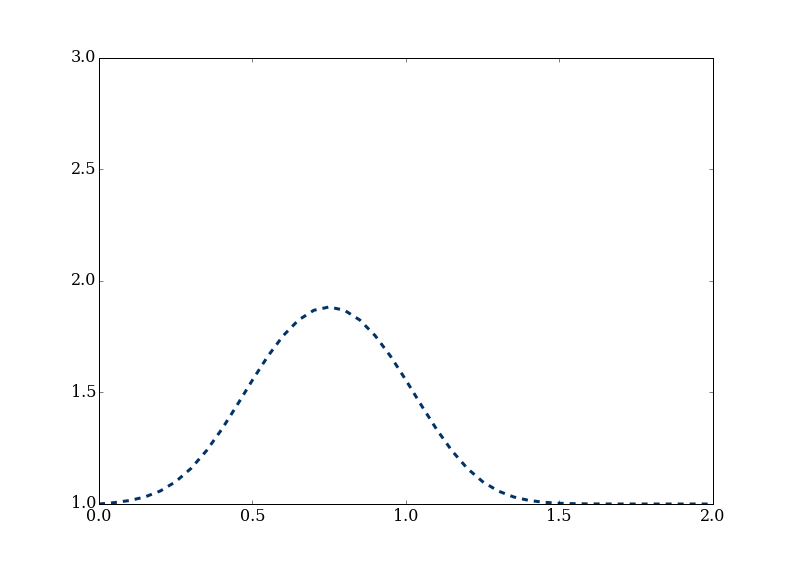
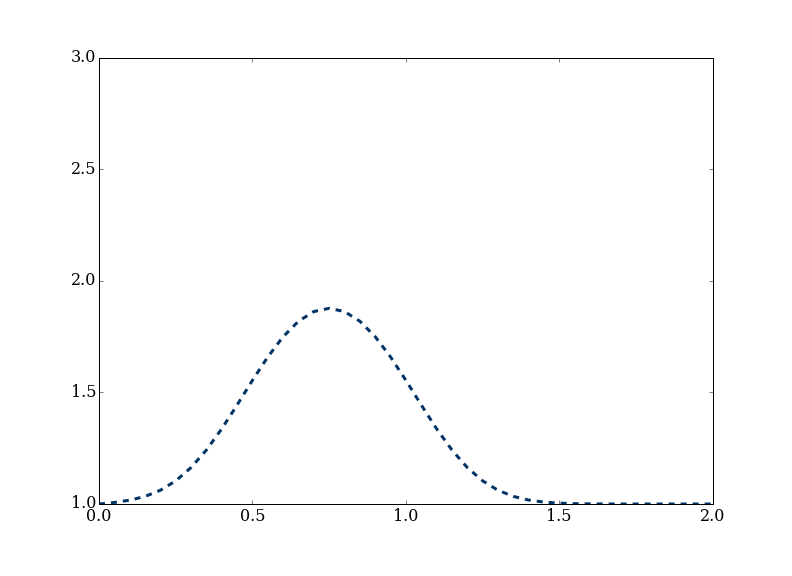
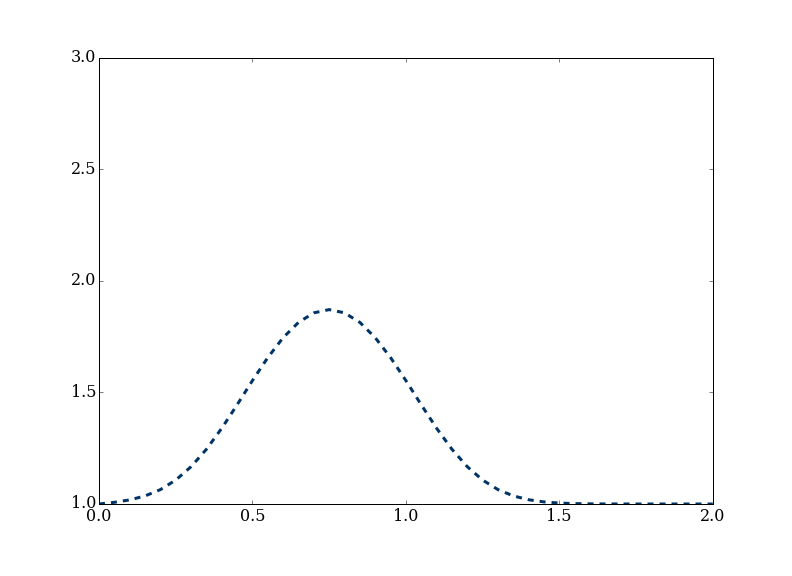
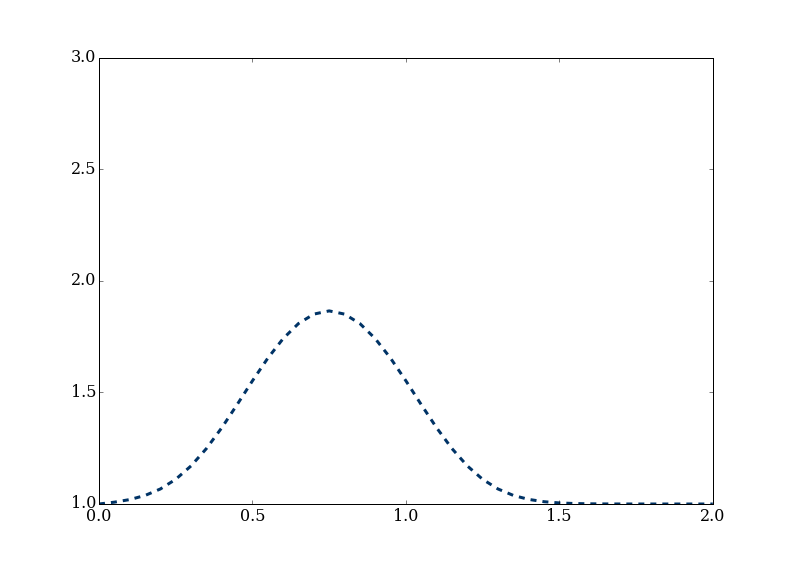
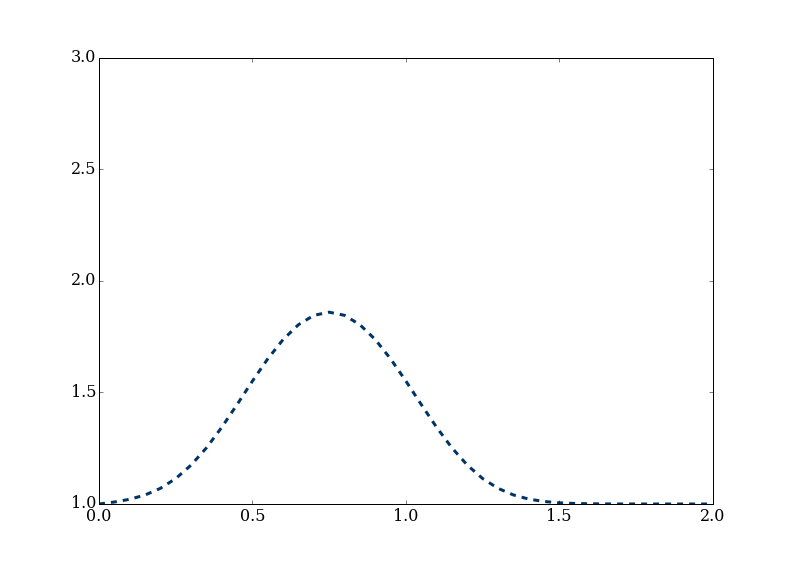
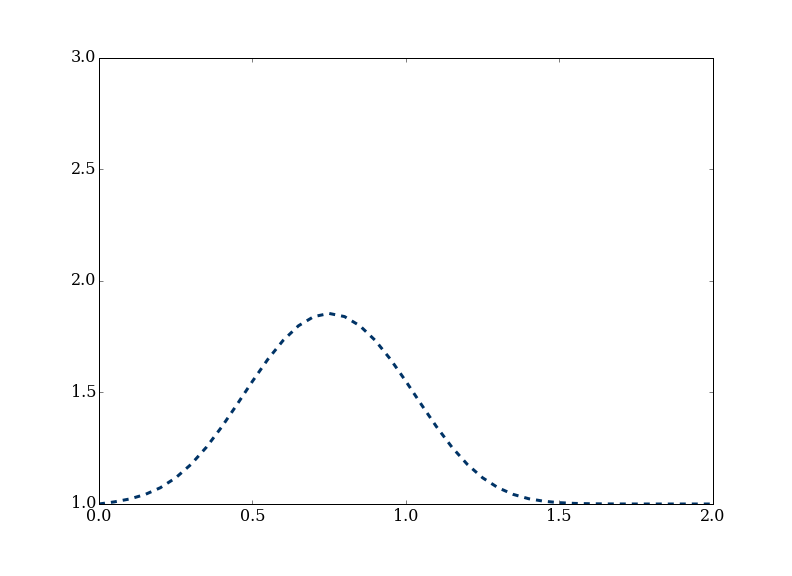
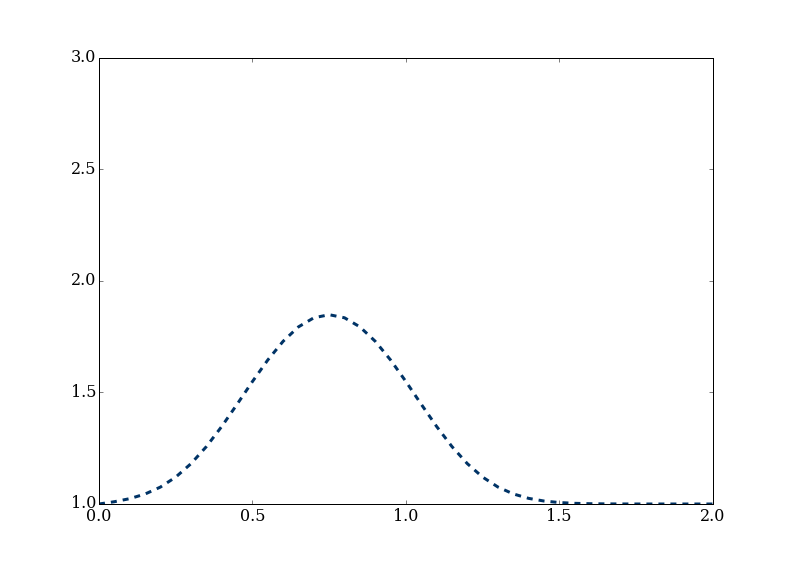
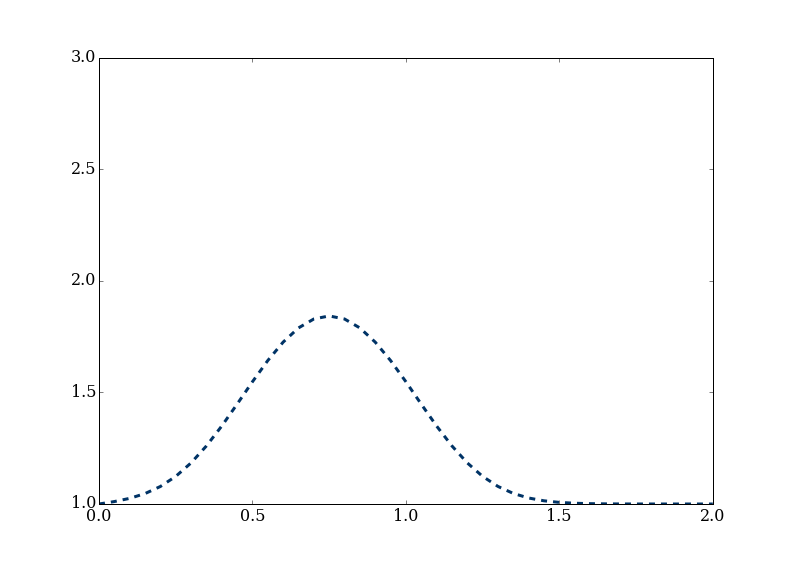
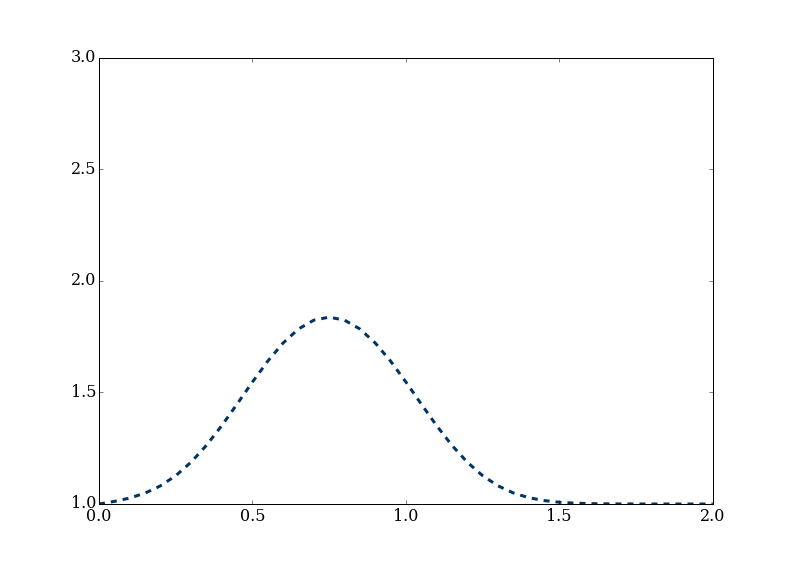
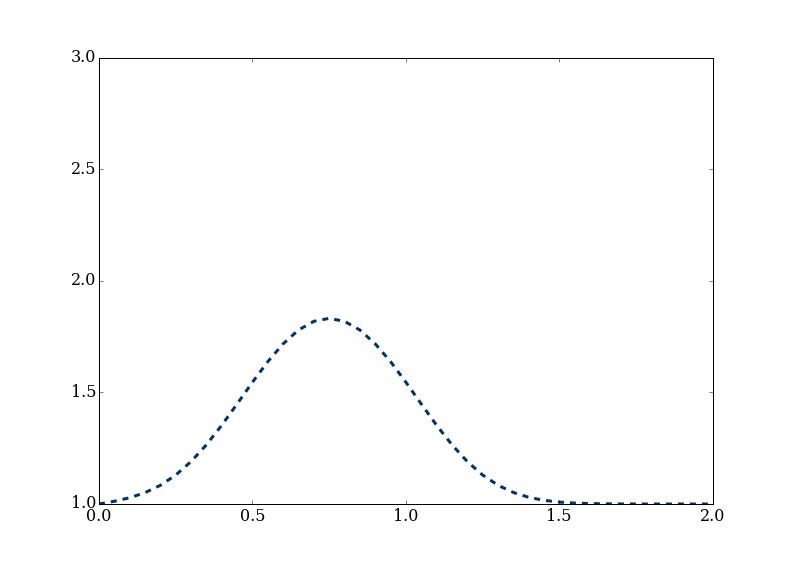
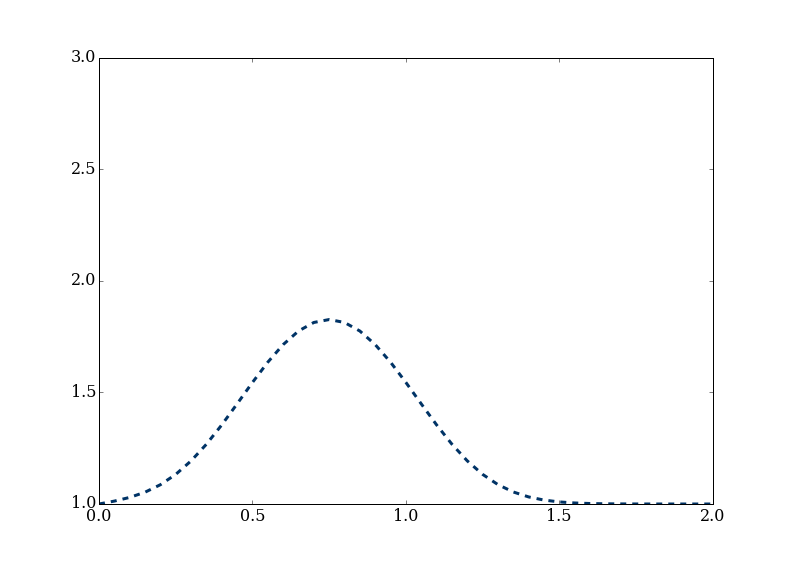
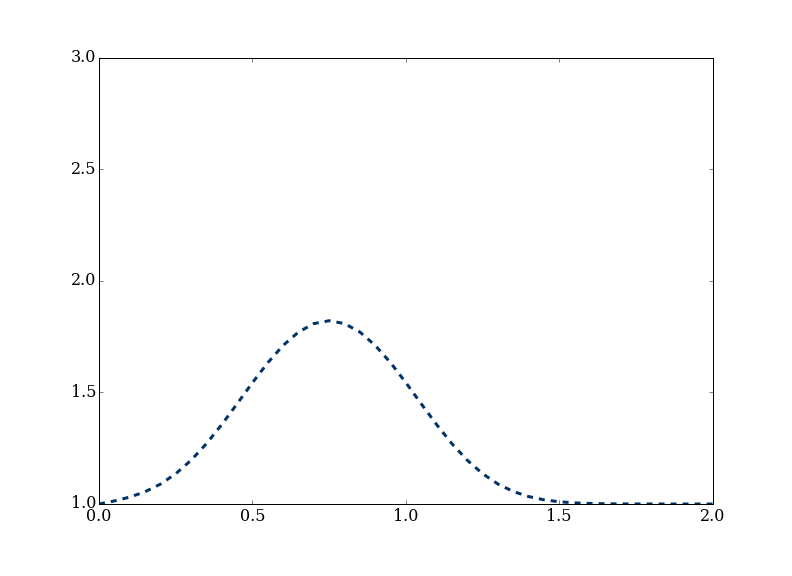
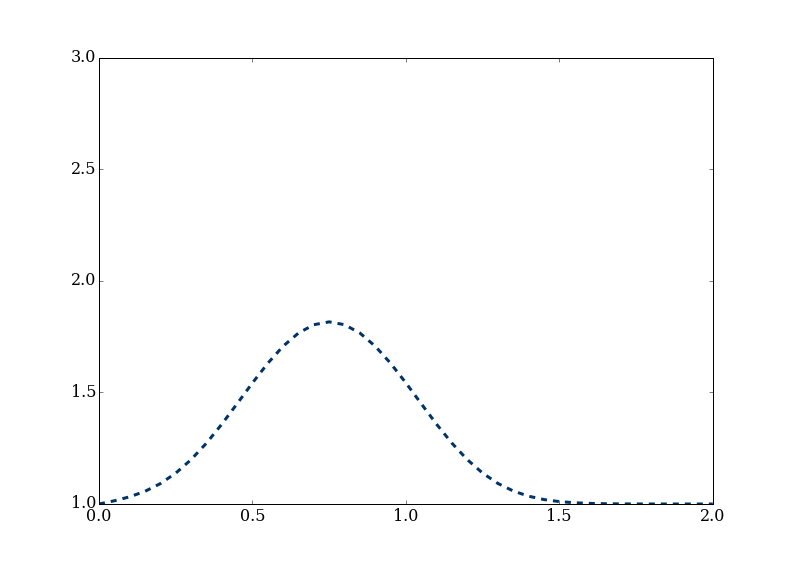
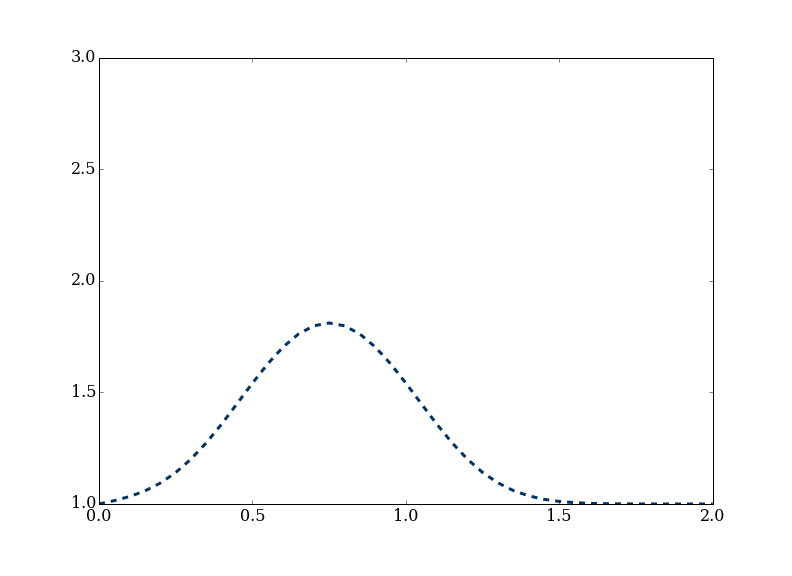
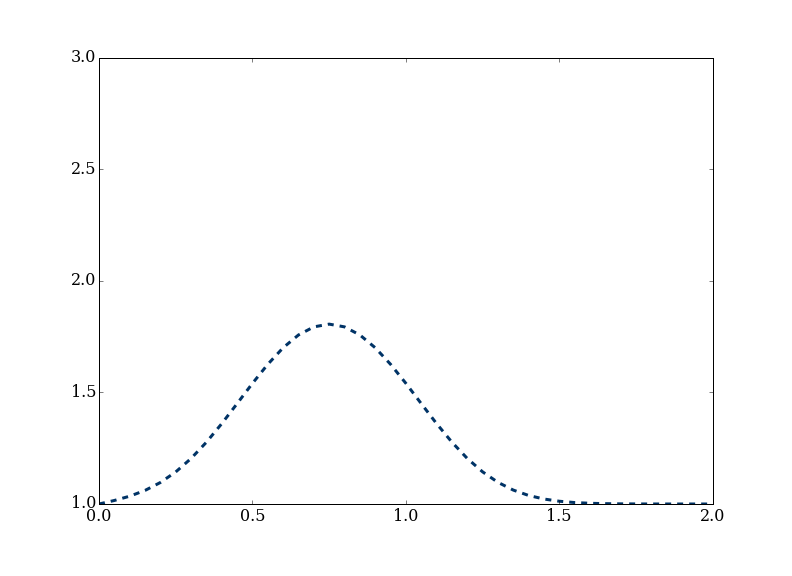
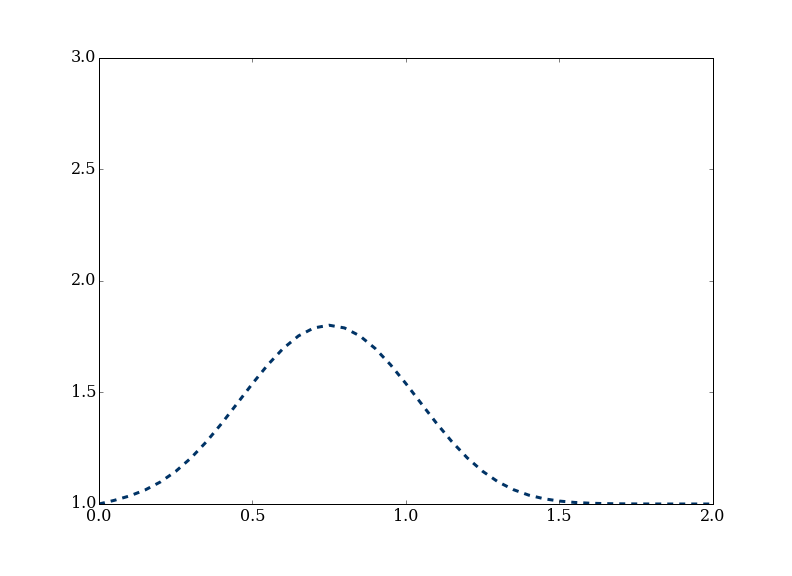
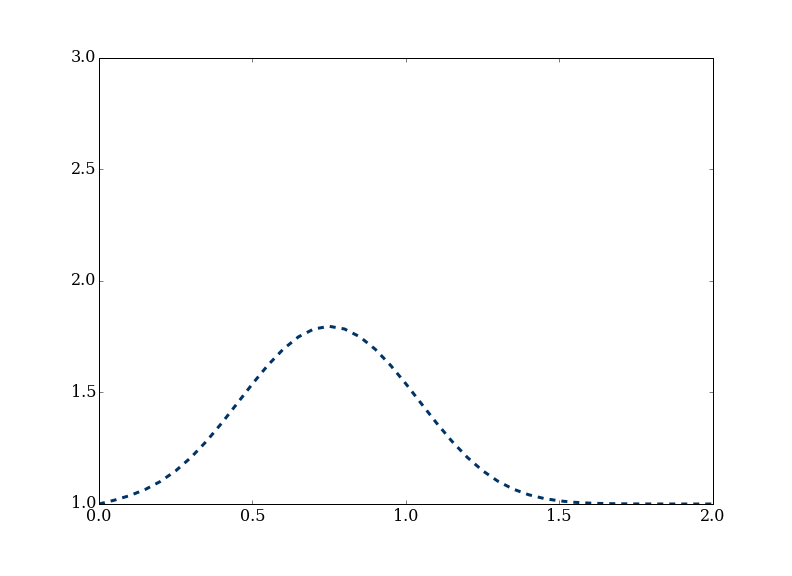
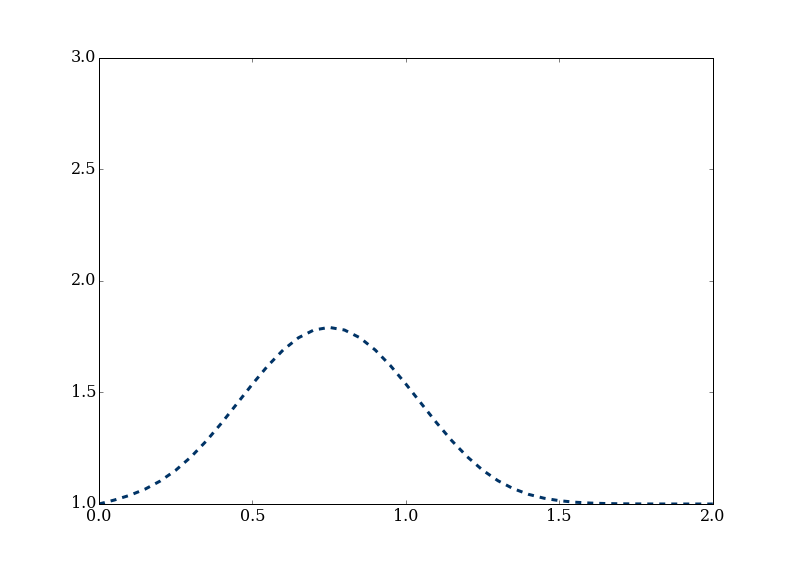
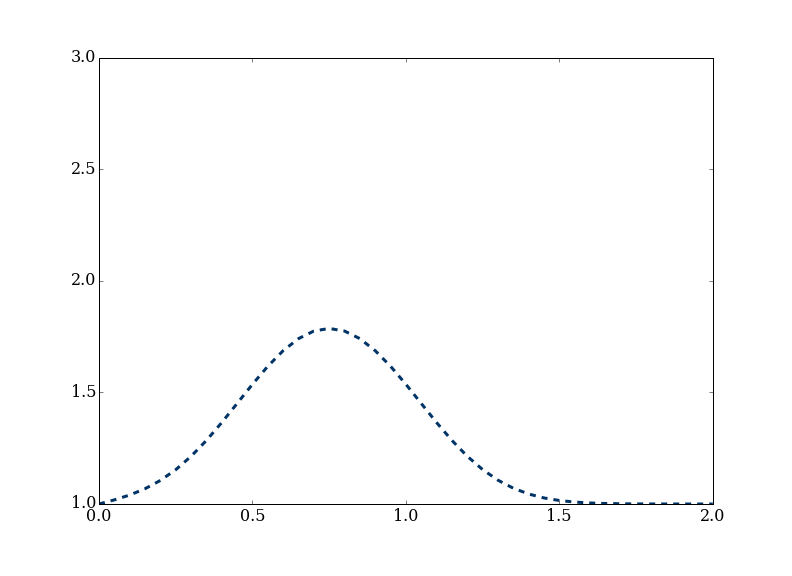
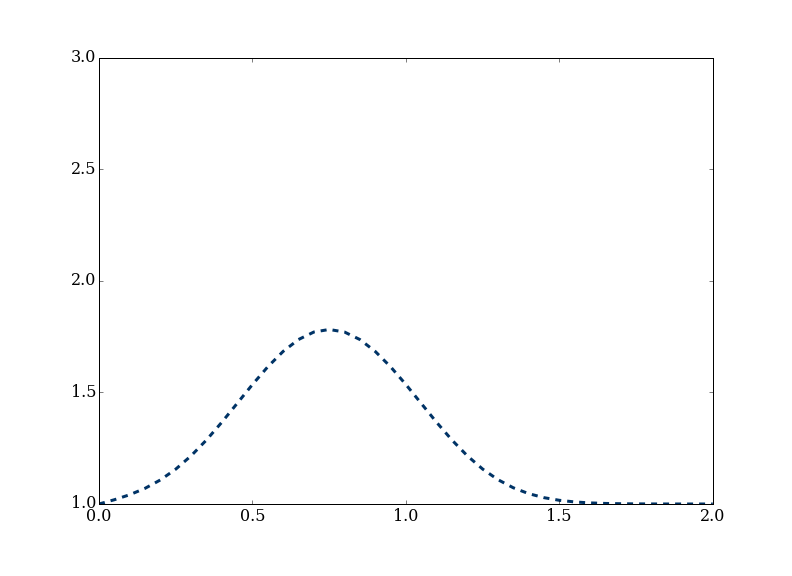
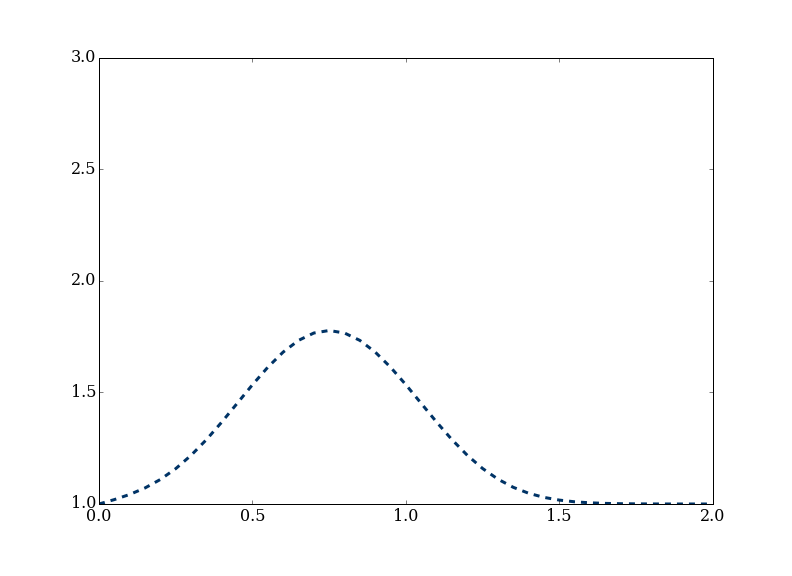

In [12]:
#Create animation by adding figure and creating add axis

fig = pyplot.figure(figsize=(11,8))
ax = pyplot.axes(xlim=(0,2), ylim=(1,3))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

def diffusion(i):
    line.set_data(x,u)
    
    un=u.copy()
    u[1:-1] = un[1:-1] + nu*dt/dx**2*\
    (un[2:] -2*un[1:-1]+un[0:-2])
    
animation.FuncAnimation(fig, diffusion, frames=nt, interval=100)

In [ ]:
#Finished